In [4]:
import wave
import matplotlib.pyplot as plt
import numpy as np

### Read wave File

c:\users\leste\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  app.launch_new_instance()


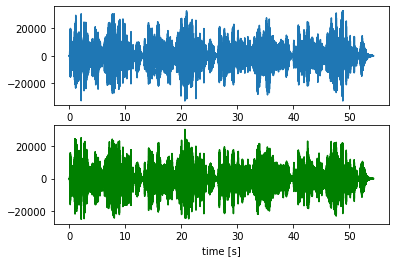

In [8]:
# open file in binary
f = wave.open("example.wav","rb")

# geteparams() returns all info of the wav file
params = f.getparams()
# it returns a tuple including num of channels, sample width [byte], sampling 
# frequency, and sampling size
# we can also use getnchannels, getsampwidt, getframerate, getnframes
nchannels, sampwidth, framerate, nframes= params[:4]

# readframes(): read the sound data
str_data = f.readframes(nframes)
f.close()

# transfer the binary data to an array
wave_data = np.fromstring(str_data,dtype = np.short)
# the sound file includes two sound channels, L and R
# so we transform the array
wave_data.shape = -1,2
wave_data = wave_data.T
# then compute sampling time based on sampling size and frequency
time = np.arange(0,nframes)*(1.0/framerate)

plt.subplot(211)
plt.plot(time,wave_data[0])
plt.subplot(212)
plt.plot(time,wave_data[1],c="g")
plt.xlabel("time [s]")
plt.show()

### Write wave File

In [9]:
import scipy.signal as signal

# 10 sec 44.1kHz
# 100Hz - 1kHz freq sweep wave
framerate = 44100
time = 10

t = np.arange(0,time,1.0/framerate)
wave_data = signal.chirp(t,100,time,1000,method="linear")*10000
wave_data = wave_data.astype(np.short)

f = wave.open("sweep.wav","wb")

f.setnchannels(1)
f.setsampwidth(2)
f.setframerate(framerate)
f.writeframes(wave_data.tostring())
f.close()